In [3]:
#cell-1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pumpkin = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week4/US-pumpkins.csv')
pumpkin = pumpkin[pumpkin['Package'].str.contains('bushel', case=True, regex=True)]
pumpkin.tail()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1738,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,15.00,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1739,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,13.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1740,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,10.75,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1741,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1742,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/30/16,12.00,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.


In [11]:
#cell-2

pumpkin.shape

(1757, 26)

In [9]:
#cell-3

city = pumpkin.value_counts(pumpkin['City Name'])
city

City Name
BOSTON           352
COLUMBIA         263
CHICAGO          248
SAN FRANCISCO    166
BALTIMORE        153
DALLAS           137
NEW YORK         112
ST. LOUIS        103
LOS ANGELES       62
ATLANTA           57
PHILADELPHIA      57
DETROIT           44
MIAMI              3
dtype: int64

In [4]:
#CELL-4

city2 = pumpkin.groupby(['Color']).count()
city2

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
Color,,,,,,,,,,,,,,,,,,,,,
ORANGE,157,0,157,157,87,0,157,157,157,145,...,0,0,0,0,0,0,157,0,0,12
STRIPED,11,0,11,11,11,0,11,11,11,11,...,0,0,0,0,0,0,11,0,0,0
WHITE,102,0,102,102,100,0,102,102,102,90,...,0,0,0,0,0,0,102,0,0,12


In [13]:
#CELL-5

pumpkin.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

To filter for the required columns in the new dataframe to work

In [5]:
#CELL-6

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkin = pumpkin.drop([x for x in pumpkin.columns if x not in new_columns], axis=1)
pumpkin

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0


To calculate the average prices and covert the date to month in figure

In [6]:
#CELL-7

price = (pumpkin['Low Price'] + pumpkin['High Price'])/2

month = pd.DatetimeIndex(pumpkin['Date']).month

Creating new pumpkins dataframe with the poosible reqired columns

In [7]:
#CELL-8

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkin['Package'], 'Low Price': pumpkin['Low Price'],'High Price': pumpkin['High Price'], 'Price': price})

new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


We normalized the price so that you show the price per bushel, since the price is based on package and some package is 1 1/9 and others is 1/2. We standardized it by doing some math as:

In [10]:
#CELL-9- Normalising inconsistancies

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

new_pumpkins


,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,12.15
71,9,1 1/9 bushel cartons,18.00,18.0,14.58
72,10,1 1/9 bushel cartons,18.00,18.0,14.58
73,10,1 1/9 bushel cartons,17.00,17.0,13.77
74,10,1 1/9 bushel cartons,15.00,15.0,12.15
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,60.00
1739,9,1/2 bushel cartons,13.75,15.0,57.50
1740,9,1/2 bushel cartons,10.75,15.0,51.50
1741,9,1/2 bushel cartons,12.00,12.0,48.00


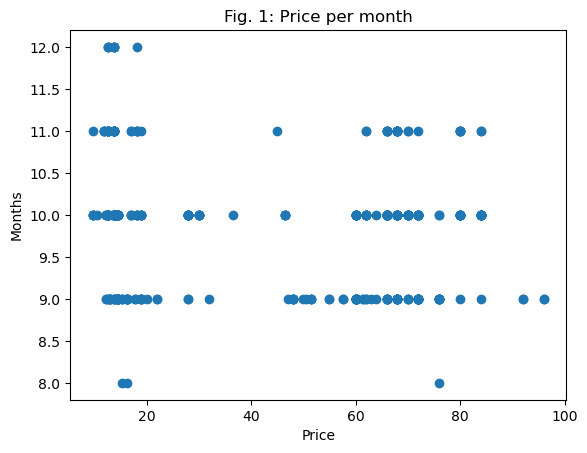

In [11]:
#CELL-10: scatttereplot
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.ylabel('Months')
plt.xlabel('Price')
plt.title('Fig. 1: Price per month')
plt.show()

#Challenges

Text(0.5, 0, 'Price')

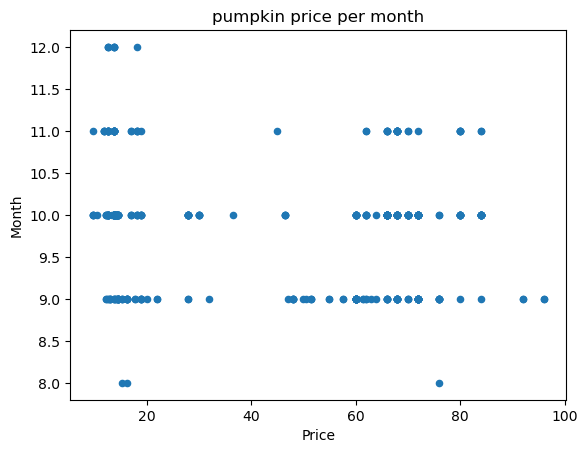

In [52]:
new_pumpkins.plot(kind='scatter',x='Price', y='Month')

plt.title('pumpkin price per month')
plt.ylabel('Month')
plt.xlabel('Price')

Text(0.5, 0, 'Month')

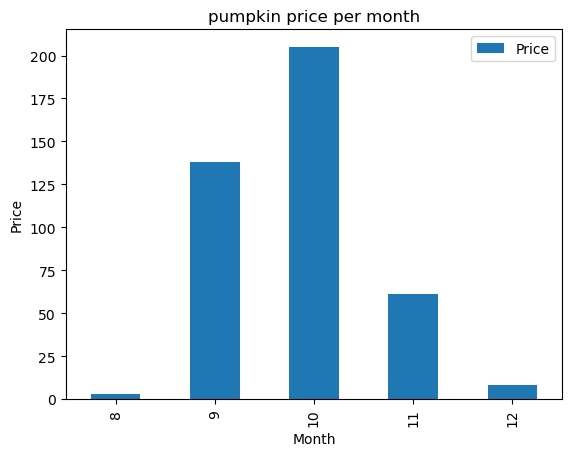

In [69]:
month_1 = new_pumpkins.groupby(['Month']).count()
month_1.plot(kind='bar', y='Price')

plt.title('pumpkin price per month')
plt.ylabel('Price')
plt.xlabel('Month')

Text(0, 0.5, 'Pumpkin Price')

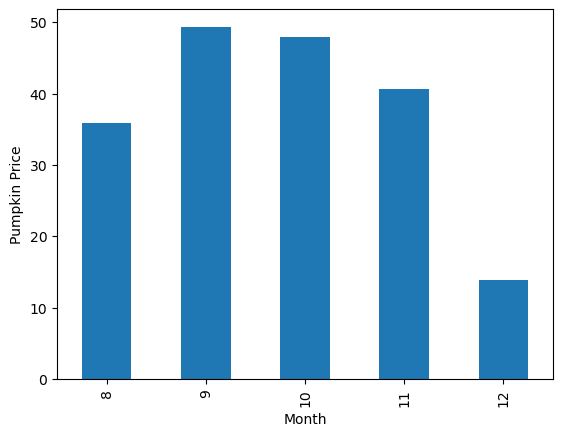

In [13]:
#CELL-!!: Bar chart from grouping month
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

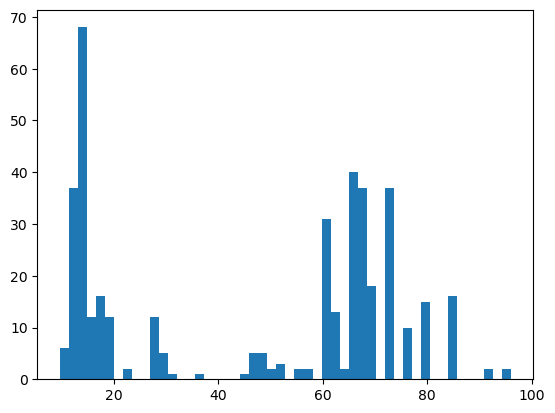

In [16]:
plt.hist(new_pumpkins['Price'], bins=50)
plt.show()

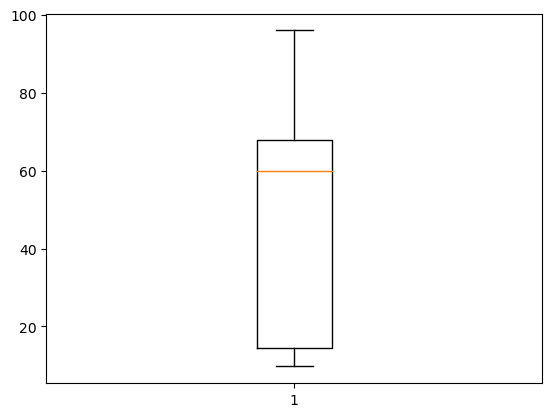

In [17]:
# create a boxplot from our data
plt.boxplot(new_pumpkins['Price'])
plt.show()

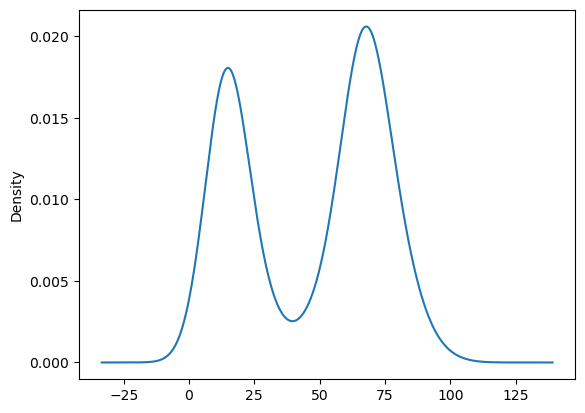

In [19]:
new_pumpkins['Price'].plot(kind='density')
plt.show()

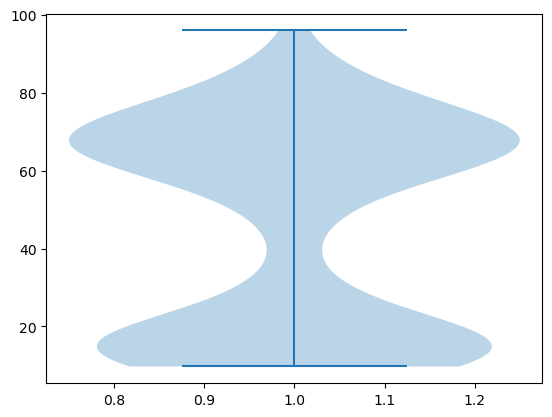

In [20]:
plt.violinplot(new_pumpkins['Price'])
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkin.drop([c for c in pumpkin.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins

,City Name,Package,Variety,Origin,Item Size,Color
70,0,0,2,0,1,0
71,0,0,2,0,3,0
72,0,0,2,0,3,0
73,0,0,2,4,1,0
75,0,0,2,0,3,0
...,...,...,...,...,...,...
1236,5,2,1,4,3,1
1239,5,2,1,4,3,1
1257,4,0,2,3,1,0
1258,4,0,2,3,1,0
